<a href="https://colab.research.google.com/github/souken-b/calc_OWC/blob/main/calc_runge_kutta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
T = 50
n = 1000
u_0 = 1

In [112]:
def rounge_kutta(t, n, f, u_0):
  h = T / n
  t = np.arange(0,T,h)
  
  u = np.empty(n)
  u[0] = u_0
  
  # 方程式を解くための反復計算
  for i in range(n-1):
    k_1 = h * f(u[i], t[i])
    k_2 = h * f(u[i] + k_1 /2 , t[i] + h/2 )
    k_3 = h * f(u[i] + k_2 /2 , t[i] + h/2 )
    k_4 = h * f(u[i] + k_3 , t[i] + h )        
    u[i+1] = u[i] + 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4 )
  
  # 誤差の計算
  v = np.empty(n)
  for i in range(n):
    v[i] = np.exp(h*i)
  e = v - u
  
  return [t, u]

In [113]:
h = T / n
t_list = np.arange(0, T, h)
y_list = odeint(f, 1, t_list)

In [114]:
f = lambda u, t=0 : u

In [115]:
t_r_list, u_r_list = rounge_kutta(T, n, f, u_0)

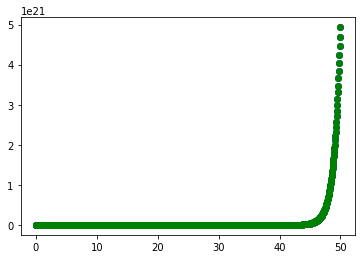

In [118]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(t_list, y_list, c='blue')
ax.scatter(t_r_list, u_r_list, c='green')
plt.show()